In [0]:
import pandas as pd
from pandas import np
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
m = pd.read_csv("/content/gdrive/My Drive/finalmerge.csv",index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
m

,Unnamed: 0_x,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Origin,Dest,Unnamed: 0_y,airport_x,date_x,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,time_x,Unnamed: 0.1,airport_y,date_y,windspeedKmph_y,winddirDegree_y,weatherCode_y,precipMM_y,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,time_y
0,57,2016-01-01,1,2016,1,1,741.0,0.0,700,0.0,14747,12478,1610.0,1600,0.0,8.0,SEA,JFK,16,JFK,2016-01-01,22,255,113,0.0,10,1015,0,32,26,41,32,74,1600,7,SEA,2016-01-01,7,107,113,0.0,10,1030,0,23,8,34,29,66,700
1,219870,2016-01-01,1,2016,1,1,705.0,0.0,700,0.0,14747,12892,934.0,900,0.0,0.0,SEA,LAX,9,LAX,2016-01-01,12,31,113,0.0,10,1020,2,30,15,51,47,46,900,7,SEA,2016-01-01,7,107,113,0.0,10,1030,0,23,8,34,29,66,700
2,356730,2016-01-01,1,2016,1,1,658.0,0.0,700,3.0,14747,12892,933.0,900,0.0,0.0,SEA,LAX,9,LAX,2016-01-01,12,31,113,0.0,10,1020,2,30,15,51,47,46,900,7,SEA,2016-01-01,7,107,113,0.0,10,1030,0,23,8,34,29,66,700
3,334974,2016-01-01,1,2016,1,1,723.0,0.0,700,6.0,14747,12478,1534.0,1500,0.0,4.0,SEA,JFK,15,JFK,2016-01-01,21,254,113,0.0,10,1016,0,33,24,42,33,74,1500,7,SEA,2016-01-01,7,107,113,0.0,10,1030,0,23,8,34,29,66,700
4,356750,2016-01-01,1,2016,1,1,726.0,0.0,700,0.0,14747,12892,1022.0,1000,0.0,3.0,SEA,LAX,10,LAX,2016-01-01,10,39,113,0.0,10,1020,9,29,13,53,49,42,1000,7,SEA,2016-01-01,7,107,113,0.0,10,1030,0,23,8,34,29,66,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815400,453453,2017-09-18,3,2017,9,18,2240.0,0.0,2200,0.0,12478,12892,134.0,200,0.0,0.0,JFK,LAX,410,LAX,2017-09-18,5,220,113,0.0,10,1012,1,70,6,74,74,87,200,430,JFK,2017-09-18,19,60,122,0.0,10,1018,98,67,26,69,69,92,2200
1815401,455805,2017-09-21,3,2017,9,21,2358.0,1.0,2200,73.0,12478,12892,247.0,200,1.0,51.0,JFK,LAX,482,LAX,2017-09-21,11,179,143,0.0,10,1010,56,63,12,65,65,91,200,502,JFK,2017-09-21,18,28,122,0.0,10,1015,96,64,26,72,72,75,2200
1815402,456636,2017-09-22,3,2017,9,22,2240.0,0.0,2200,0.0,12478,12892,141.0,200,0.0,0.0,JFK,LAX,506,LAX,2017-09-22,10,135,113,0.0,10,1010,3,59,12,67,67,75,200,526,JFK,2017-09-22,22,14,116,0.0,10,1014,48,57,33,71,71,63,2200
1815403,457242,2017-09-23,3,2017,9,23,2146.0,0.0,2100,3.0,12478,12892,21.0,100,0.0,0.0,JFK,LAX,529,LAX,2017-09-23,6,202,113,0.0,10,1009,4,61,8,68,68,80,100,549,JFK,2017-09-23,12,1,113,0.0,10,1017,0,68,15,86,86,55,2100


In [0]:
m.describe()

,Unnamed: 0_x,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Unnamed: 0_y,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,time_x,Unnamed: 0.1,windspeedKmph_y,winddirDegree_y,weatherCode_y,precipMM_y,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,time_y
count,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06
mean,2.201694e+05,2.515150e+00,2.016494e+03,6.544028e+00,1.576547e+01,1.318193e+03,1.999537e-01,1.297760e+03,1.398036e+01,1.273796e+04,1.273937e+04,1.475983e+03,1.476221e+03,2.089705e-01,1.423142e+01,3.691335e+02,1.254870e+01,1.885540e+02,1.456484e+02,2.630467e-01,9.501128e+00,1.016012e+03,4.168825e+01,4.946636e+01,1.688418e+01,6.604433e+01,6.476720e+01,6.210289e+01,1.476221e+03,3.673489e+02,1.230411e+01,1.865897e+02,1.462245e+02,2.550000e-01,9.418141e+00,1.016167e+03,4.280911e+01,4.934882e+01,1.661847e+01,6.527912e+01,6.387153e+01,6.345448e+01,1.297760e+03
std,1.449516e+05,1.104474e+00,4.999603e-01,3.396029e+00,8.790736e+00,5.166970e+02,3.999654e-01,5.026491e+02,4.148781e+01,1.354192e+03,1.356409e+03,5.528555e+02,5.348307e+02,4.065734e-01,4.142203e+01,2.110346e+02,6.471354e+00,8.603604e+01,6.990671e+01,1.004745e+00,1.722554e+00,6.315331e+00,3.932331e+01,1.611147e+01,9.024073e+00,1.710963e+01,1.893322e+01,2.252080e+01,5.348307e+02,2.110373e+02,6.508047e+00,8.698118e+01,6.996480e+01,9.781583e-01,1.861534e+00,6.315904e+00,3.971353e+01,1.615241e+01,8.993893e+00,1.715484e+01,1.906687e+01,2.245897e+01,5.026491e+02
min,0.000000e+00,1.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.039700e+04,1.039700e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.810000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,-2.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.840000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,-2.500000e+01,3.000000e+00,0.000000e+00
25%,9.091400e+04,2.000000e+00,2.016000e+03,4.000000e+00,8.000000e+00,9.040000e+02,0.000000e+00,9.000000e+02,0.000000e+00,1.129800e+04,1.129800e+04,1.059000e+03,1.100000e+03,0.000000e+00,0.000000e+00,1.860000e+02,8.000000e+00,1.240000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.800000e+01,1.000000e+01,5.600000e+01,5.400000e+01,4.700000e+01,1.100000e+03,1.840000e+02,7.000000e+00,1.200000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.800000e+01,1.000000e+01,5.500000e+01,5.300000e+01,4.800000e+01,9.000000e+02
50%,2.067500e+05,3.000000e+00,2.016000e+03,7.000000e+00,1.600000e+01,1.314000e+03,0.000000e+00,1.300000e+03,0.000000e+00,1.289200e+04,1.289200e+04,1.523000e+03,1.500000e+03,0.000000e+00,0.000000e+00,3.710000e+02,1.200000e+01,1.970000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.300000e+01,5.200000e+01,1.500000e+01,6.700000e+01,6.700000e+01,6.600000e+01,1.500000e+03,3.690000e+02,1.100000e+01,1.950000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.500000e+01,5.100000e+01,1.500000e+01,6.600000e+01,6.600000e+01,6.700000e+01,1.300000e+03
75%,3.458240e+05,3.000000e+00,2.017000e+03,9.000000e+00,2.300000e+01,1.736000e+03,0.000000e+00,1.700000e+

In [0]:
m['DepDelayMinutes'].mean()

13.98036195780005

In [0]:
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


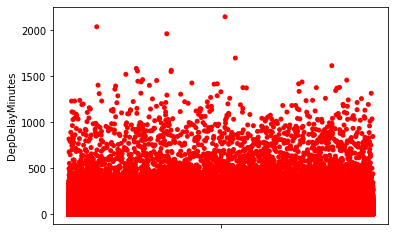

In [0]:
sns.stripplot(y="DepDelayMinutes", data=m,color = 'red')

In [17]:
d=m.drop(["ArrDelayMinutes",
                "ArrTime",
                "ArrDel15",
                 "Unnamed: 0_x",
                 "Unnamed: 0_y",
                 "Unnamed: 0.1",
                "Origin",
                "Dest",
                "airport_x",
                "airport_y",
                "FlightDate",
                "date_y",
                "date_x",
                "time_x",
                "time_y",
                "windspeedKmph_y",
                "winddirDegree_y",
                "weatherCode_y",
                "precipMM_y",
                "visibility_y",
                "pressure_y",
                "cloudcover_y",
                "DewPointF_y",
                "WindGustKmph_y",
                "tempF_y",
               "WindChillF_y",
               "humidity_y"],axis=1)
d

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x
0,1,2016,1,1,741.0,0.0,700,0.0,14747,12478,1600,22,255,113,0.0,10,1015,0,32,26,41,32,74
1,1,2016,1,1,705.0,0.0,700,0.0,14747,12892,900,12,31,113,0.0,10,1020,2,30,15,51,47,46
2,1,2016,1,1,658.0,0.0,700,3.0,14747,12892,900,12,31,113,0.0,10,1020,2,30,15,51,47,46
3,1,2016,1,1,723.0,0.0,700,6.0,14747,12478,1500,21,254,113,0.0,10,1016,0,33,24,42,33,74
4,1,2016,1,1,726.0,0.0,700,0.0,14747,12892,1000,10,39,113,0.0,10,1020,9,29,13,53,49,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815400,3,2017,9,18,2240.0,0.0,2200,0.0,12478,12892,200,5,220,113,0.0,10,1012,1,70,6,74,74,87
1815401,3,2017,9,21,2358.0,1.0,2200,73.0,12478,12892,200,11,179,143,0.0,10,1010,56,63,12,65,65,91
1815402,3,2017,9,22,2240.0,0.0,2200,0.0,12478,12892,200,10,135,113,0.0,10,1010,3,59,12,67,67,75
1815403,3,2017,9,23,2146.0,0.0,2100,3.0,12478,12892,100,6,202,113,0.0,10,1009,4,61,8,68,68,80


In [18]:
d.shape

(1815405, 23)

In [0]:
e=m["ArrDel15"]

In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(d, e, test_size = 0.20, random_state = None) 

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_jobs=-1,random_state = None)
etc.fit(X_train,Y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [0]:
Y_predetc=etc.predict(X_test)

In [24]:
#ACCURACY
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predetc)

ERROR! Session/line number was not unique in database. History logging moved to new session 60


0.9063845257669776

In [25]:
from sklearn import metrics
cm=metrics.confusion_matrix(Y_test,Y_predetc)
print(cm)

[[272894  14249]
 [ 19741  56197]]


In [26]:
from sklearn.metrics import classification_report
target_names=["Class 0","Class 1"]
print(classification_report(Y_test,Y_predetc,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.93      0.95      0.94    287143
     Class 1       0.80      0.74      0.77     75938

    accuracy                           0.91    363081
   macro avg       0.87      0.85      0.85    363081
weighted avg       0.90      0.91      0.91    363081



In [27]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
#XGBoost
import xgboost 
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
X_test_np = X_test.values

In [0]:
Y_predxgb=model.predict(X_test)

In [31]:
#from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predxgb)

0.9169964828784761

In [32]:
#from sklearn import metrics
cm=metrics.confusion_matrix(Y_test,Y_predxgb)
print(cm)

[[281313   5830]
 [ 24307  51631]]


In [33]:
target_names=["Class 0","Class 1"]
print(classification_report(Y_test,Y_predxgb,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.98      0.95    287143
     Class 1       0.90      0.68      0.77     75938

    accuracy                           0.92    363081
   macro avg       0.91      0.83      0.86    363081
weighted avg       0.92      0.92      0.91    363081



In [34]:
#logistic regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(d,e,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(cnf_matrix)
target_names=["Class 0","Class 1"]

In [36]:
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.98      0.95    358997
     Class 1       0.88      0.68      0.77     94855

    accuracy                           0.91    453852
   macro avg       0.90      0.83      0.86    453852
weighted avg       0.91      0.91      0.91    453852

